In [9]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import metrics

In [10]:
# load load_breast_cancer
import sklearn.datasets
dat = sklearn.datasets.load_breast_cancer()
ix = np.where(dat["feature_names"] == "mean area")[0][0]
iy = np.where(dat["feature_names"] == "mean concave points")[0][0]

In [11]:
# normalize (use StandardScaler if you wish)


X0 = np.asarray([dat["data"][:,ix], dat["data"][:,iy], np.ones(dat["data"].shape[0])]).T
y0 = (1.*(dat["target"]==np.where(dat["target_names"] == "malignant")[0][0]) +
     -1.*(dat["target"]==np.where(dat["target_names"] == "benign")[0][0]))

X,y = X0.copy()[:,:-1], y0.copy() # scikit learn doesn't require additional all-ones columns
print(np.mean(X,axis=0), np.std(X,axis=0))
norm = StandardScaler()
norm.fit(X)
print(np.mean(norm.transform(X),axis=0), np.std(norm.transform(X),axis=0))

[6.54889104e+02 4.89191459e-02] [3.51604754e+02 3.87687325e-02]
[-8.79983452e-16  9.73249991e-16] [1. 1.]


In [13]:
def plot_classification_sklearn(model, norm):
    x_range = [0,2600]
    y_range = [0, 0.21]

    # plot classifcation regions
    grid=200
    xx,yy = np.meshgrid(np.linspace(x_range[0], x_range[1], grid),
                        np.linspace(y_range[0], y_range[1], grid))
    X_ = np.array([np.ravel(xx), np.ravel(yy)]).T
    zz = model.decision_function(norm.transform(X_)).reshape(grid,grid)
    cs = plt.contourf(xx,yy,zz, zz,levels=[-float("inf"),0,float("inf")],alpha=0.2,colors=["b","r"])
    plt.contour(cs, colors='k')

    s1 = plt.scatter(dat["data"][:,ix][dat["target"]==1], dat["data"][:,iy][dat["target"]==1], marker='x', color='C0')
    s2 = plt.scatter(dat["data"][:,ix][dat["target"]==0], dat["data"][:,iy][dat["target"]==0], marker='+', color='C3')
    plt.xlim([0,2600])
    plt.ylim([0,0.21])
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend([s1,s2], ['Benign', 'Malignant'])

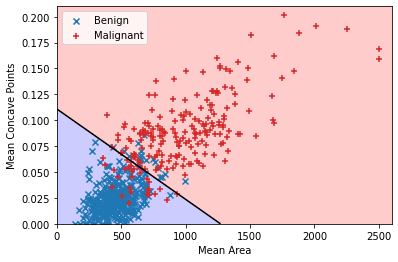

In [15]:
# What happens to the "score" when C = 1, 1/10, 150, 100, 1000?
#c=1

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1, solver='lbfgs')
model.fit(norm.fit_transform(X), y)
plot_classification_sklearn(model, norm)

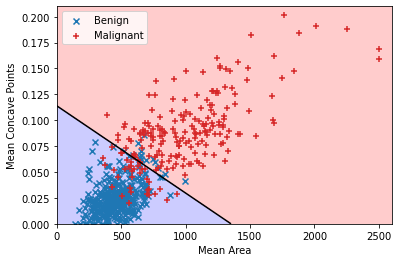

In [16]:
#c=0.1

model = LogisticRegression(C=0.1, solver='lbfgs')
model.fit(norm.fit_transform(X), y)
plot_classification_sklearn(model, norm)

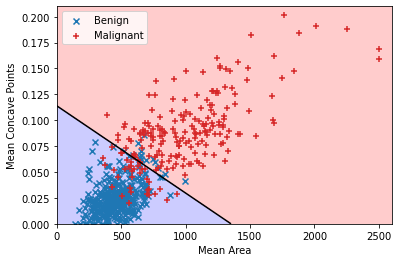

In [17]:
#c=150

model = LogisticRegression(C=0.1, solver='lbfgs')
model.fit(norm.fit_transform(X), y)
plot_classification_sklearn(model, norm)


In [4]:
# partition with test size 0.3

In [5]:
# fit logistic regression and draw ROC curve
# use predict_log_proba()